In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
data={
    "kv_metr":[130, 200, 79, 48, 345, 78, 73, 88, 91, 101 ],
    "narxi":[8490, 10780, 19270, 6098, 8849, 34949, 8459, 40621, 47035, 55043]
}
df=pd.DataFrame(data)

In [8]:
df

,kv_metr,narxi
0,130,8490
1,200,10780
2,79,19270
3,48,6098
4,345,8849
5,78,34949
6,73,8459
7,88,40621
8,91,47035
9,101,55043


In [10]:
X=df[["kv_metr"]]
y=df["narxi"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train

,kv_metr
5,78
0,130
7,88
2,79
9,101
4,345
3,48
6,73


In [14]:
y_train

5    34949
0     8490
7    40621
2    19270
9    55043
4     8849
3     6098
6     8459
Name: narxi, dtype: int64

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_model=LinearRegression()

In [17]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [18]:
weight=lr_model.coef_[0]
bias=lr_model.intercept_

In [19]:
print("Og'irlik:",weight)
print("bias:",bias)

Og'irlik: -46.97879028732663
bias: 28254.12755633271


In [20]:
LR_y=weight*X+bias

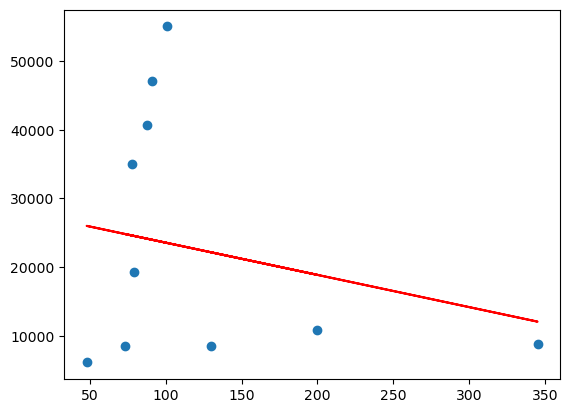

In [21]:
plt.scatter(X,y)
plt.plot(X,LR_y,c='r')
plt.show()

In [22]:
b=lr_model.predict(X_test)
print(b)

[23979.05764019 18858.36949887]


In [23]:
y_test

8    47035
1    10780
Name: narxi, dtype: int64

In [24]:
xato=y_test-b
print(xato)

8    23055.942360
1    -8078.369499
Name: narxi, dtype: float64


In [27]:
m=lr_model.predict([[9]])
print(m)

[27831.31844375]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
y_pred=lr_model.predict(X_test)
y_pred

array([23979.05764019, 18858.36949887])

In [29]:
y_test

8    47035
1    10780
Name: narxi, dtype: int64

In [30]:
print("Intercept (Beta_0):",lr_model.intercept_)
print("Slope(Beta_1):",lr_model.coef_[0])

Intercept (Beta_0): 28254.12755633271
Slope(Beta_1): -46.97879028732663


In [31]:
n=pd.DataFrame({"Xaqiqiy":y_test,"Bashorat":y_pred})
n

,Xaqiqiy,Bashorat
8,47035,23979.057640
1,10780,18858.369499


In [32]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
mae=mean_absolute_error(y_test,y_pred)
print("o'rtacha xato:",mae)

o'rtacha xato: 15567.155929340699


In [36]:
mse=mean_squared_error(y_test,y_pred)
print("O'rtacha kv xato:",mse)

O'rtacha kv xato: 298418265.9296485


In [37]:
rmse=pow(mse,1/2)
rmse

17274.787000992183

In [38]:
r2=r2_score(y_test,y_pred)
print("R-kvadrat(R^2):",r2)

R-kvadrat(R^2): 0.09186675465297534


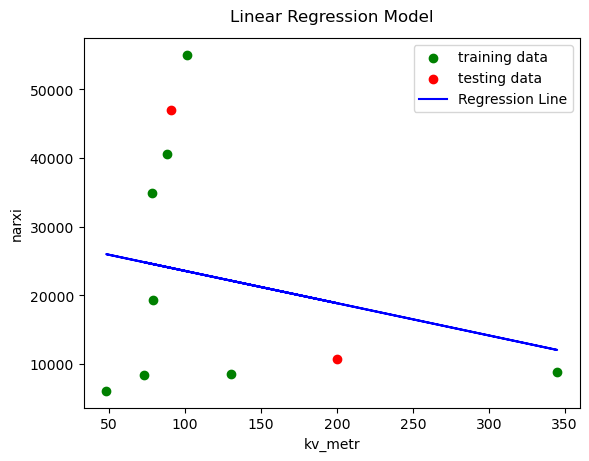

In [39]:
plt.scatter(X_train,y_train,color='green',label='training data')
plt.scatter(X_test,y_test,color='red',label='testing data')
plt.plot(X,lr_model.predict(X),color='blue',label='Regression Line')
plt.title("Linear Regression Model",pad=12)
plt.xlabel("kv_metr")
plt.ylabel("narxi")
plt.legend()
plt.show()